In [161]:
import os
from datetime import datetime

import json
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

sns.set_style("whitegrid") # Choose a Seaborn style (or 'whitegrid', 'darkgrid', etc.)


# Set matplotlib parameters globally
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "axes.titlesize": 40,
    "axes.labelsize": 20,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 20,
    "axes.grid": True,
})

custom_palette = sns.color_palette("deep")
sns.set_palette(custom_palette)


In [162]:
# Select latest data file
folder = '../data/'
files = [
    file for file in os.listdir(folder)
    if "data-up-to" in file and file.endswith(".json")
]
most_recent_data_file = max(files, key=lambda x: datetime.strptime(x.split('-')[0] + x.split('-')[1] + x.split('-')[2] + " " + x.split('-')[3] + ":" + x.split('-')[4] + ":" + x.split('-')[5], '%Y%m%d %H:%M:%S'))
data_file = folder + most_recent_data_file
print("Data file: {}".format(data_file))

Data file: ../data/2025-07-01-10-48-48-data-up-to-865042-K-104-chi-4032-k-323-completed.json


In [163]:
# Load data into DataFrame
with open(data_file, 'r') as data_file:
    data = json.load(data_file)
df = pd.DataFrame(data)
df

,target,proof_size,proof_score,proof_level,timestamp,block_hash,block_level,proof_generation_latency,level_0_difficulty,level_1_difficulty,...,level_3_difficulty,level_4_difficulty,level_5_difficulty,level_6_difficulty,level_7_difficulty,level_8_difficulty,level_9_difficulty,level_10_difficulty,level_11_difficulty,level_12_difficulty
0,2695953529101130949315647634472399133601089873...,1,1,0,1231006505,1062894486921856208405014351944454958038946459...,256,0.102282,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2695953529101130949315647634472399133601089873...,2,2,0,1231469665,1385949097536080555105847587592198316001649390...,0,0.014782,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2695953529101130949315647634472399133601089873...,3,3,0,1231469744,1120357047773602012812174058398316757397361004...,1,0.009060,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2695953529101130949315647634472399133601089873...,4,4,0,1231470173,1376505914199784814833151514217235786942951357...,0,0.007391,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2695953529101130949315647634472399133601089873...,5,5,0,1231470988,8291227170897828765976220166323524636529507549...,1,0.007629,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865038,2928805436162009520992638294218449682899899138...,5850,492036562519238225,12,1728572242,2572351244937158715940235265564542008489236908...,0,1.764059,9305053136804880,9305053136804880,...,9305053136804880,9305053136804880,9195845137350102,9101335545721983,8812499996518723,8804798378832696,7713091101805790,6003473158582011,3792917999049665,2307074548265634
865039,2928805436162009520992638294218449682899899138...,5850,492039140449009740,12,1728572873,2557582487944604257576427754015620191127788016...,3,1.828432,9305053136804880,9305053136804880,...,9305053136804880,9305053136804880,9195845137350102,9101335545721983,8812499996518723,8804798378832696,7713091101805790,6003473158582011,3792917999049665,2307074548265634
865040,2928805436162009520992638294218449682899899138...,5851,492131190043558225,12,1728573656,1543943121936974952224205150418320745867815550...,0,1.831532,9305053136804880,9305053136804880,...,9305053136804880,9305053136804880,9195845137350102,9101335545721983,8812499996518723,8804798378832696,7713091101805790,6003473158582011,3792917999049665,2307074548265634
865041,2928805436162009520992638294218449682899899138...,5852,492223239638106710,12,1728574093,1041364755763932846977662115553096395174126802...,1,1.770496,9305053136804880,9305053136804880,...,9305053136804880,9305053136804880,9195845137350102,9101335545721983,8812499996518723,8804798378832696,7713091101805790,6003473158582011,3792917999049665,2307074548265634


In [164]:
# Is df[COLUMN] monotonically increasing?
print("Is df[COLUMN] monotonically increasing/decreasing?\n")
print(f"df['timestamp']     {str(df['timestamp'].is_monotonic_increasing):5}. Should be False.")
print(f"df['proof_score']   {str(df['proof_score'].is_monotonic_increasing):5}. Should be False.")
print(f"df['proof_size']    {str(df['proof_size'].is_monotonic_increasing):5}. Should be False.")
print(f"df['target']        {str(df['target'].is_monotonic_decreasing):5}. Should be False.")

Is df[COLUMN] monotonically increasing/decreasing?

df['timestamp']     False. Should be False.
df['proof_score']   False. Should be False.
df['proof_size']    False. Should be False.
df['target']        False. Should be False.


In [165]:
def is_difficulty_decreasing(row):
    # Extract and sort only the columns that match level_X_difficulty
    level_cols = sorted(
        [col for col in row.index if col.startswith("level_") and col.endswith("_difficulty")],
        key=lambda c: int(c.split("_")[1])  # Sort by level number
    )
    values = [row[col] for col in level_cols if pd.notna(row[col])]
    return all(values[i] <= values[i - 1] for i in range(1, len(values)))

df["valid_difficulty_order"] = df.apply(is_difficulty_decreasing, axis=1)
df[~df["valid_difficulty_order"]]

,target,proof_size,proof_score,proof_level,timestamp,block_hash,block_level,proof_generation_latency,level_0_difficulty,level_1_difficulty,...,level_4_difficulty,level_5_difficulty,level_6_difficulty,level_7_difficulty,level_8_difficulty,level_9_difficulty,level_10_difficulty,level_11_difficulty,level_12_difficulty,valid_difficulty_order
60803,1551048739079662593758612650769536967206480773...,5418,68837,8,1276480142,3196437457240290430201869854376374264992888730...,2,0.959158,1247,1247,...,1248,1212,986,741,416,0,0,0,0,False
60804,1551048739079662593758612650769536967206480773...,5419,68854,8,1276480462,4724830586262101685232485135894184096451565693...,1,1.002550,1246,1247,...,1248,1212,986,741,416,0,0,0,0,False
60805,1551048739079662593758612650769536967206480773...,5418,68847,8,1276480742,7440831603031550550259478085302991984395742456...,1,0.966549,1245,1246,...,1248,1212,986,741,416,0,0,0,0,False
60806,1551048739079662593758612650769536967206480773...,5419,68864,8,1276481189,7879637529579133457577261680247066197238641714...,0,0.954628,1244,1246,...,1248,1212,986,741,416,0,0,0,0,False
60807,1551048739079662593758612650769536967206480773...,5414,68809,8,1276483299,1331564231162830749638061569481829828880624121...,0,1.008987,1243,1245,...,1248,1212,986,741,416,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864219,3049569316454662029123808771945796148814068844...,5824,489171002474001901,12,1728095020,1326298092312627838068692348628474648289296357...,1,1.772165,9305053136804880,9305053136804880,...,9224447232445401,9120439613917041,8989976500966413,8772214927108221,8775537789171977,7601723910583145,5819759107957172,3647080517430399,2307074548265634,False
864220,3049569316454662029123808771945796148814068844...,5824,489169935211595930,12,1728095720,2978828484623815986598638532621688149354836887...,0,1.760006,9305053136804880,9305053136804880,...,9224447232445401,9120439613917041,8989976500966413,8772214927108221,8775537789171977,7601723910583145,5819759107957172,3647080517430399,2307074548265634,False
864221,3049569316454662029123808771945796148814068844...,5825,489258339613966929,12,1728095826,2025506421204311743748862327437646706746999930...,3,1.758814,9305053136804880,9305053136804880,...,9224447232445401,9120439613917041,8989976500966413,8772214927108221,8775537789171977,7601723910583145,5819759107957172,3647080517430399,2307074548265634,False
864222,3049569316454662029123808771945796148814068844...,5826,489346744016337928,12,1728096666,2768626762444549719433191497654085327801490897...,0,1.746416,9305053136804880,9305053136804880,...,9224447232445401,9120439613917041,8989976500966413,8772214927108221,8775537789171977,7601723910583145,5819759107957172,3647080517430399,2307074548265634,False


In [166]:
# Add block height (index) as column
df["height"] = df.index

In [167]:
# Create datetime objects column from timestamps column
df['timestamp_dt'] = pd.to_datetime(df['timestamp'], unit='s')
df

,target,proof_size,proof_score,proof_level,timestamp,block_hash,block_level,proof_generation_latency,level_0_difficulty,level_1_difficulty,...,level_6_difficulty,level_7_difficulty,level_8_difficulty,level_9_difficulty,level_10_difficulty,level_11_difficulty,level_12_difficulty,valid_difficulty_order,height,timestamp_dt
0,2695953529101130949315647634472399133601089873...,1,1,0,1231006505,1062894486921856208405014351944454958038946459...,256,0.102282,0,0,...,0,0,0,0,0,0,0,True,0,2009-01-03 18:15:05
1,2695953529101130949315647634472399133601089873...,2,2,0,1231469665,1385949097536080555105847587592198316001649390...,0,0.014782,0,0,...,0,0,0,0,0,0,0,True,1,2009-01-09 02:54:25
2,2695953529101130949315647634472399133601089873...,3,3,0,1231469744,1120357047773602012812174058398316757397361004...,1,0.009060,0,0,...,0,0,0,0,0,0,0,True,2,2009-01-09 02:55:44
3,2695953529101130949315647634472399133601089873...,4,4,0,1231470173,1376505914199784814833151514217235786942951357...,0,0.007391,0,0,...,0,0,0,0,0,0,0,True,3,2009-01-09 03:02:53
4,2695953529101130949315647634472399133601089873...,5,5,0,1231470988,8291227170897828765976220166323524636529507549...,1,0.007629,0,0,...,0,0,0,0,0,0,0,True,4,2009-01-09 03:16:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865038,2928805436162009520992638294218449682899899138...,5850,492036562519238225,12,1728572242,2572351244937158715940235265564542008489236908...,0,1.764059,9305053136804880,9305053136804880,...,9101335545721983,8812499996518723,8804798378832696,7713091101805790,6003473158582011,3792917999049665,2307074548265634,True,865038,2024-10-10 14:57:22
865039,2928805436162009520992638294218449682899899138...,5850,492039140449009740,12,1728572873,2557582487944604257576427754015620191127788016...,3,1.828432,9305053136804880,9305053136804880,...,9101335545721983,8812499996518723,8804798378832696,7713091101805790,6003473158582011,3792917999049665,2307074548265634,True,865039,2024-10-10 15:07:53
865040,2928805436162009520992638294218449682899899138...,5851,492131190043558225,12,1728573656,1543943121936974952224205150418320745867815550...,0,1.831532,9305053136804880,9305053136804880,...,9101335545721983,8812499996518723,8804798378832696,7713091101805790,6003473158582011,3792917999049665,2307074548265634,True,865040,2024-10-10 15:20:56
865041,2928805436162009520992638294218449682899899138...,5852,492223239638106710,12,1728574093,1041364755763932846977662115553096395174126802...,1,1.770496,9305053136804880,9305053136804880,...,9101335545721983,8812499996518723,8804798378832696,7713091101805790,6003473158582011,3792917999049665,2307074548265634,True,865041,2024-10-10 15:28:13


In [168]:
# Add genesis target and difficulty column
genesis_target = 26959535291011309493156476344723991336010898738574164086137773096960
df['difficulty'] = genesis_target / df['target']
df['difficulty'] = df['difficulty'].astype(float)
df

,target,proof_size,proof_score,proof_level,timestamp,block_hash,block_level,proof_generation_latency,level_0_difficulty,level_1_difficulty,...,level_7_difficulty,level_8_difficulty,level_9_difficulty,level_10_difficulty,level_11_difficulty,level_12_difficulty,valid_difficulty_order,height,timestamp_dt,difficulty
0,2695953529101130949315647634472399133601089873...,1,1,0,1231006505,1062894486921856208405014351944454958038946459...,256,0.102282,0,0,...,0,0,0,0,0,0,True,0,2009-01-03 18:15:05,1.000000e+00
1,2695953529101130949315647634472399133601089873...,2,2,0,1231469665,1385949097536080555105847587592198316001649390...,0,0.014782,0,0,...,0,0,0,0,0,0,True,1,2009-01-09 02:54:25,1.000000e+00
2,2695953529101130949315647634472399133601089873...,3,3,0,1231469744,1120357047773602012812174058398316757397361004...,1,0.009060,0,0,...,0,0,0,0,0,0,True,2,2009-01-09 02:55:44,1.000000e+00
3,2695953529101130949315647634472399133601089873...,4,4,0,1231470173,1376505914199784814833151514217235786942951357...,0,0.007391,0,0,...,0,0,0,0,0,0,True,3,2009-01-09 03:02:53,1.000000e+00
4,2695953529101130949315647634472399133601089873...,5,5,0,1231470988,8291227170897828765976220166323524636529507549...,1,0.007629,0,0,...,0,0,0,0,0,0,True,4,2009-01-09 03:16:28,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865038,2928805436162009520992638294218449682899899138...,5850,492036562519238225,12,1728572242,2572351244937158715940235265564542008489236908...,0,1.764059,9305053136804880,9305053136804880,...,8812499996518723,8804798378832696,7713091101805790,6003473158582011,3792917999049665,2307074548265634,True,865038,2024-10-10 14:57:22,9.204959e+13
865039,2928805436162009520992638294218449682899899138...,5850,492039140449009740,12,1728572873,2557582487944604257576427754015620191127788016...,3,1.828432,9305053136804880,9305053136804880,...,8812499996518723,8804798378832696,7713091101805790,6003473158582011,3792917999049665,2307074548265634,True,865039,2024-10-10 15:07:53,9.204959e+13
865040,2928805436162009520992638294218449682899899138...,5851,492131190043558225,12,1728573656,1543943121936974952224205150418320745867815550...,0,1.831532,9305053136804880,9305053136804880,...,8812499996518723,8804798378832696,7713091101805790,6003473158582011,3792917999049665,2307074548265634,True,865040,2024-10-10 15:20:56,9.204959e+13
865041,2928805436162009520992638294218449682899899138...,5852,492223239638106710,12,1728574093,1041364755763932846977662115553096395174126802...,1,1.770496,9305053136804880,9305053136804880,...,8812499996518723,8804798378832696,7713091101805790,6003473158582011,3792917999049665,2307074548265634,True,865041,2024-10-10 15:28:13,9.204959e+13


In [169]:
df.dtypes

target                              object
proof_size                           int64
proof_score                          int64
proof_level                          int64
timestamp                            int64
block_hash                          object
block_level                          int64
proof_generation_latency           float64
level_0_difficulty                   int64
level_1_difficulty                   int64
level_2_difficulty                   int64
level_3_difficulty                   int64
level_4_difficulty                   int64
level_5_difficulty                   int64
level_6_difficulty                   int64
level_7_difficulty                   int64
level_8_difficulty                   int64
level_9_difficulty                   int64
level_10_difficulty                  int64
level_11_difficulty                  int64
level_12_difficulty                  int64
valid_difficulty_order                bool
height                               int64
timestamp_d

In [170]:
# DataFrame description
df.describe()

,proof_size,proof_score,proof_level,timestamp,block_level,proof_generation_latency,level_0_difficulty,level_1_difficulty,level_2_difficulty,level_3_difficulty,...,level_6_difficulty,level_7_difficulty,level_8_difficulty,level_9_difficulty,level_10_difficulty,level_11_difficulty,level_12_difficulty,height,timestamp_dt,difficulty
count,865043.000000,8.650430e+05,865043.000000,8.650430e+05,865043.000000,865043.000000,8.650430e+05,8.650430e+05,8.650430e+05,8.650430e+05,...,8.650430e+05,8.650430e+05,8.650430e+05,8.650430e+05,8.650430e+05,8.650430e+05,8.650430e+05,865043.000000,865043,8.650430e+05
mean,5715.495242,6.511555e+16,10.104688,1.478748e+09,0.999643,1.510524,1.226864e+15,1.226314e+15,1.225191e+15,1.222977e+15,...,1.190524e+15,1.156526e+15,1.085413e+15,9.502680e+14,7.742702e+14,5.279168e+14,1.153481e+14,432521.000000,2016-11-10 03:15:25.081351680,1.225804e+13
min,1.000000,1.000000e+00,0.000000,1.231007e+09,0.000000,0.005722,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2009-01-03 18:15:05,1.000000e+00
25%,5657.000000,1.721286e+10,10.000000,1.358011e+09,0.000000,1.369953,3.406483e+08,3.379531e+08,3.379531e+08,3.379531e+08,...,3.296671e+08,3.317273e+08,2.771001e+08,2.188590e+08,1.612712e+08,0.000000e+00,0.000000e+00,216260.500000,2013-01-12 17:18:25.500000,3.368767e+06
50%,5774.000000,1.212026e+15,11.000000,1.475408e+09,0.000000,1.584291,2.295861e+13,2.295861e+13,2.295861e+13,2.295861e+13,...,2.201114e+13,2.173672e+13,1.994480e+13,1.523928e+13,9.290686e+12,5.053847e+12,0.000000e+00,432521.000000,2016-10-02 11:27:17,2.412272e+11
75%,5841.000000,8.977308e+16,11.000000,1.600365e+09,1.000000,1.724482,1.674900e+15,1.674900e+15,1.674900e+15,1.674900e+15,...,1.634128e+15,1.655636e+15,1.629918e+15,1.442666e+15,1.092462e+15,7.384304e+14,0.000000e+00,648781.500000,2020-09-17 17:42:05.500000,1.678778e+13
max,6011.000000,4.949334e+17,12.000000,1.728574e+09,256.000000,5.174160,9.429316e+15,9.429316e+15,9.429316e+15,9.429316e+15,...,9.101336e+15,8.812500e+15,8.804798e+15,7.713091e+15,6.003473e+15,3.792918e+15,2.307075e+15,865042.000000,2024-10-10 15:30:23,9.267158e+13
std,312.156375,1.144319e+17,1.455655,1.410821e+08,1.440024,0.308317,2.157852e+15,2.157021e+15,2.155087e+15,2.151502e+15,...,2.096615e+15,2.041572e+15,1.918266e+15,1.657627e+15,1.334253e+15,9.174729e+14,4.590489e+14,249716.548792,NaN,2.147582e+13


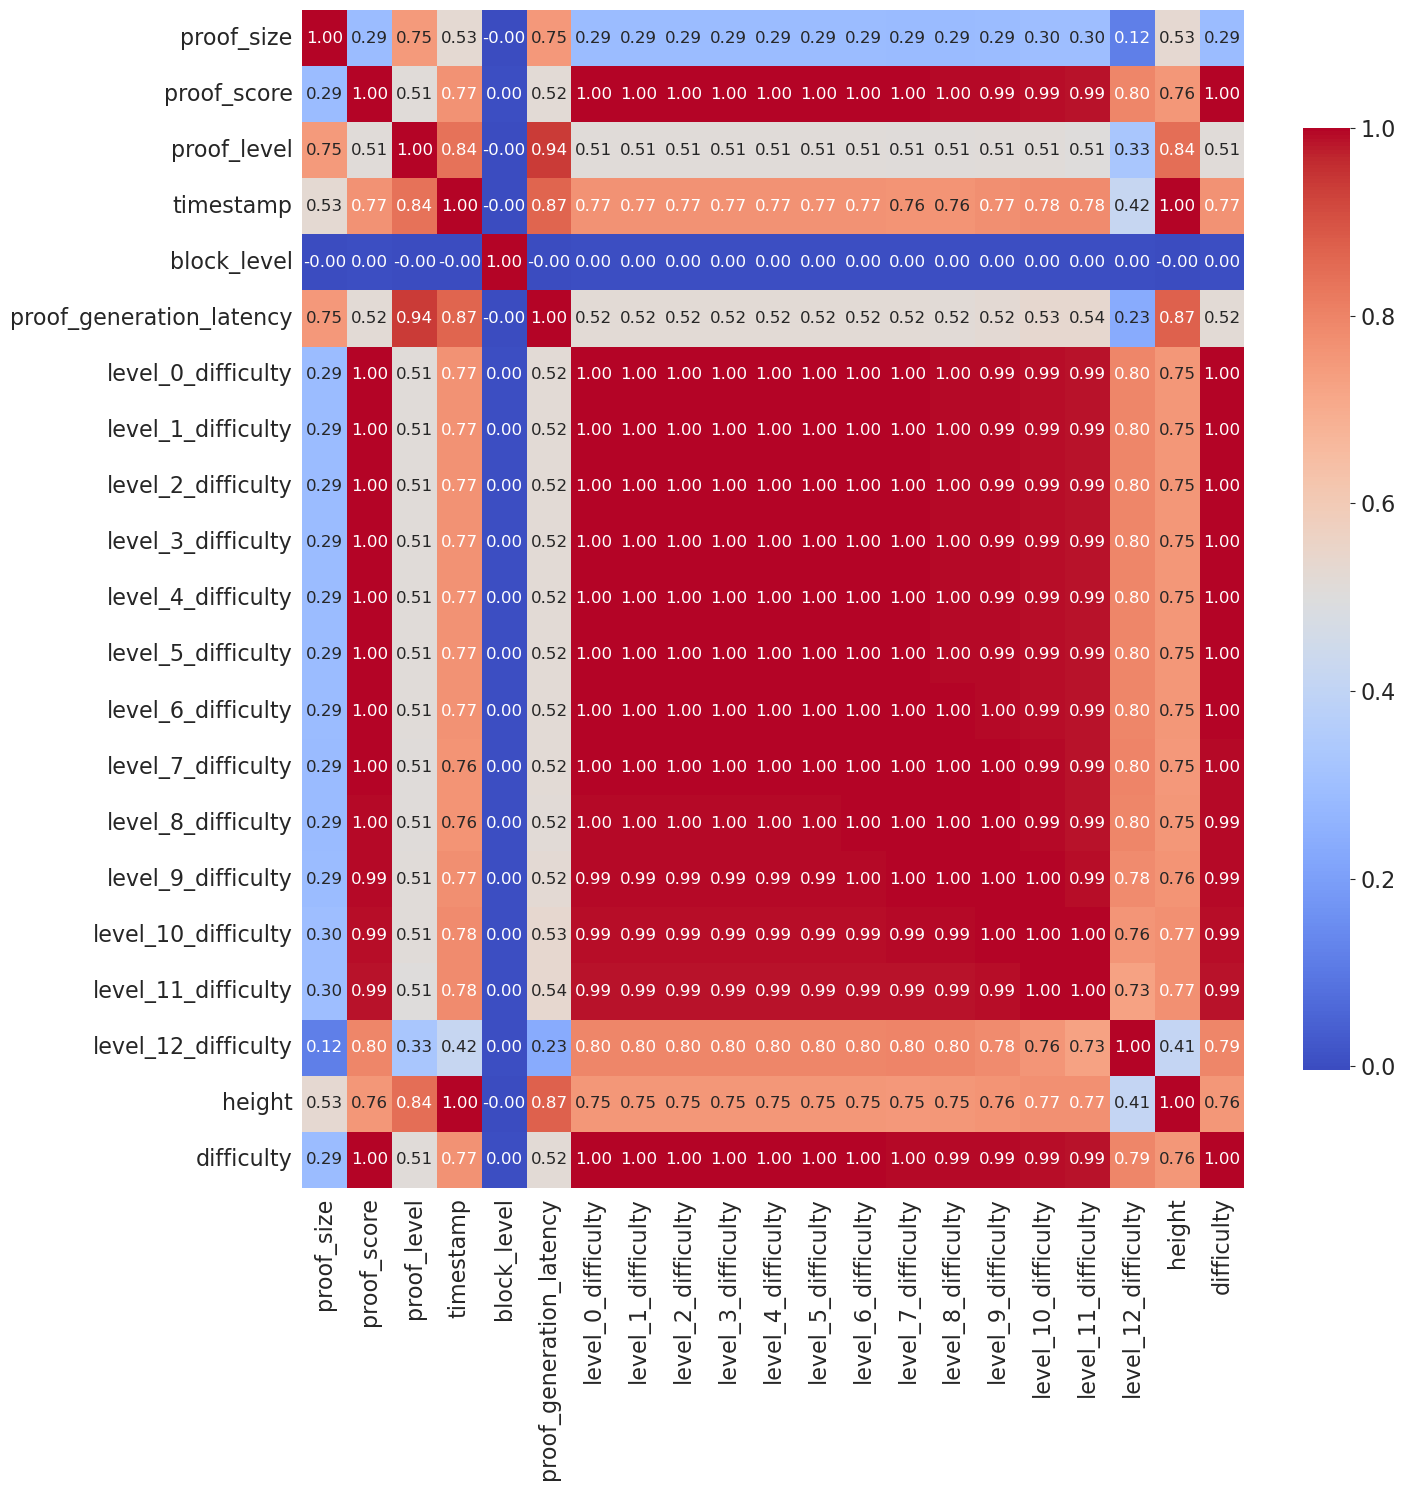

In [171]:
# Correlation matrix
corr = df.select_dtypes('number').corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'size': 12}, cbar_kws={'shrink': 0.8})

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig("correlation-matrix.pdf", format="pdf")
plt.show()

/tmp/ipykernel_54111/4266053763.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


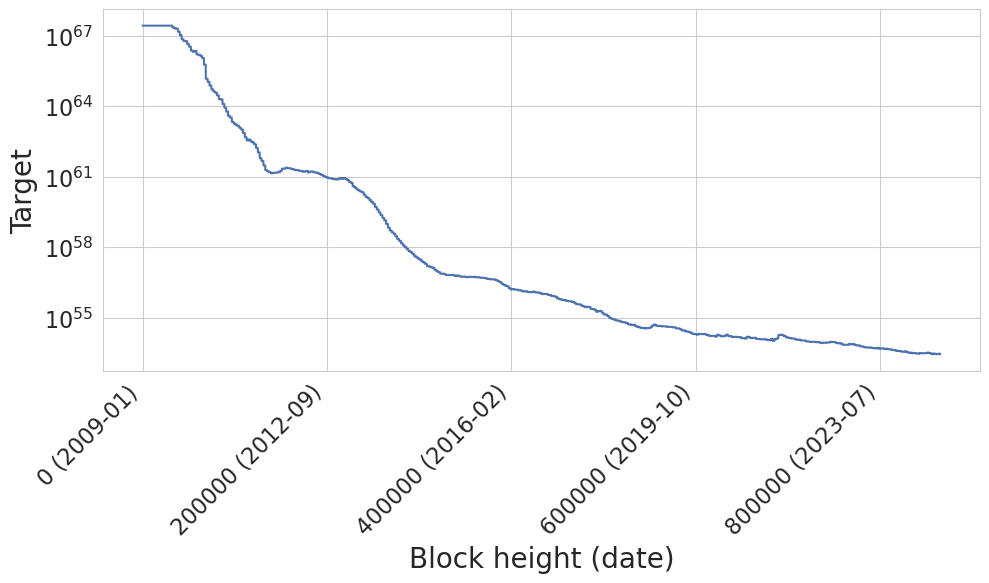

In [172]:
# Plot target over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['target'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Target', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

# Change y-axis to logscale
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.offsetText.set_visible(False)  # Hide the offset text
plt.yscale('log')  # Set y-axis to log scale

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig("target-variation-over-time.pdf", format="pdf")
plt.show()

/tmp/ipykernel_54111/150838884.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


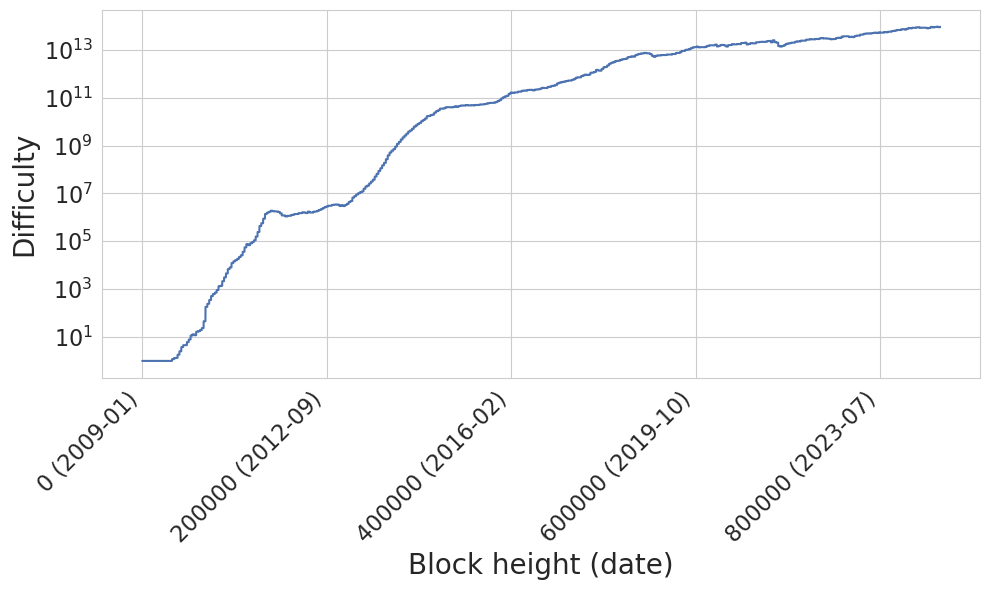

In [173]:
# Plot difficulty over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['difficulty'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Difficulty', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

# Change y-axis to logscale
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.offsetText.set_visible(False)  # Hide the offset text
plt.yscale('log')  # Set y-axis to log scale

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig("difficulty-variation-over-time.pdf", format="pdf")
plt.show()

In [174]:
# Number of times the target increases, and their heights
target_increases_count = 0
target_increases_heights = []
prev_target = None
for i, target in enumerate(df['target']):
    if prev_target is not None and target > prev_target:
        target_increases_count += 1
        target_increases_heights.append(df['height'][i] - 1)  # Subtract 1 to get the height of the block that caused the increase
    prev_target = target
target_increases_count_percent = target_increases_count / (len(df)/2016) * 100

print(f"Target increases {target_increases_count} times ({target_increases_count_percent:.2f}%) out of {len(df)/2016} epochs.")
print(f"Target increases heights: {target_increases_heights}")

# Are the target increases heights multiples of 2016?
target_increases_heights_multiples = [height % 2016 == 0 for height in target_increases_heights]
print(f"Are the target increases heights multiples of 2016? {target_increases_heights_multiples}")

Target increases 90 times (20.97%) out of 429.0887896825397 epochs.
Target increases heights: [56447, 114911, 141119, 143135, 145151, 147167, 149183, 151199, 153215, 155231, 167327, 175391, 177407, 181439, 183455, 211679, 213695, 217727, 332639, 334655, 340703, 348767, 352799, 358847, 362879, 401183, 409247, 415295, 423359, 435455, 473759, 481823, 493919, 495935, 532223, 546335, 550367, 552383, 554399, 560447, 566495, 572543, 580607, 586655, 602783, 606815, 618911, 622943, 631007, 633023, 637055, 641087, 647135, 651167, 655199, 661247, 663263, 673343, 681407, 685439, 687455, 689471, 691487, 711647, 725759, 727775, 731807, 737855, 741887, 743903, 745919, 755999, 762047, 766079, 770111, 776159, 788255, 796319, 800351, 806399, 820511, 826559, 832607, 836639, 842687, 846719, 848735, 850751, 856799, 862847]
Are the target increases heights multiples of 2016? [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 

/tmp/ipykernel_54111/3018936539.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


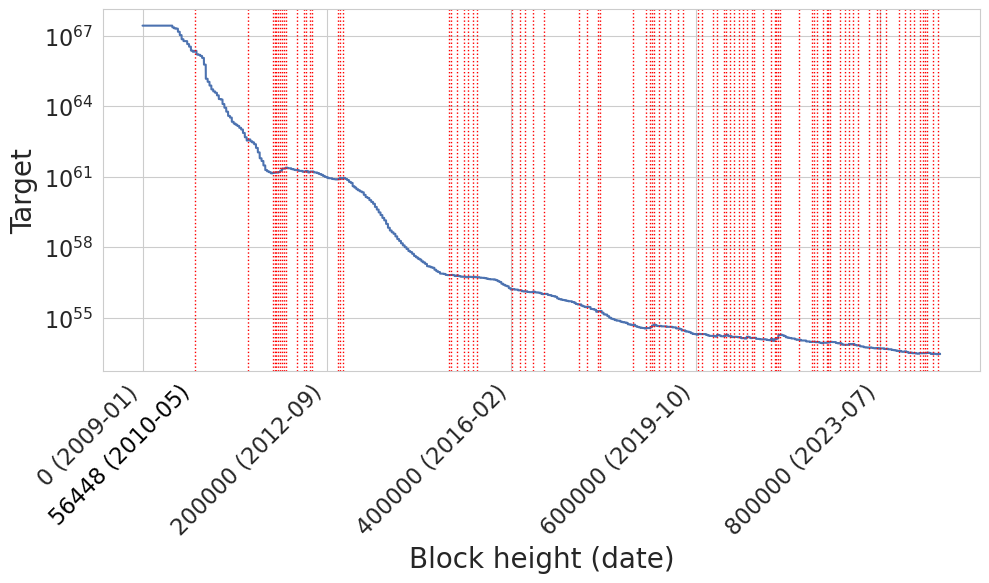

In [175]:
# Plot target over time with target increases
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['target'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Target', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

# Change y-axis to logscale
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.offsetText.set_visible(False)  # Hide the offset text
plt.yscale('log')  # Set y-axis to log scale

# Add vertical red lines when target increases
prev_target = None
first_line_label = False
for i, target in enumerate(df['target']):
    if prev_target is not None and target > prev_target:
        # print(df.iloc[i]['height']) # print block heights of red lines
        plt.axvline(x=df.iloc[i]['height'], color='red', linestyle=':', linewidth=1)
        if not first_line_label:
            plt.text(df.iloc[i]['height'], -0.025, f"{df.iloc[i]['height']} ({df.iloc[i]['timestamp_dt'].strftime('%Y-%m')})", transform=plt.gca().get_xaxis_transform(), ha='right', va='top', rotation=45, color='black', size=16)
            first_line_label = True
    prev_target = target

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig("target-variation-over-time-with-increases.pdf", format="pdf")
plt.show()

/tmp/ipykernel_54111/2557023692.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


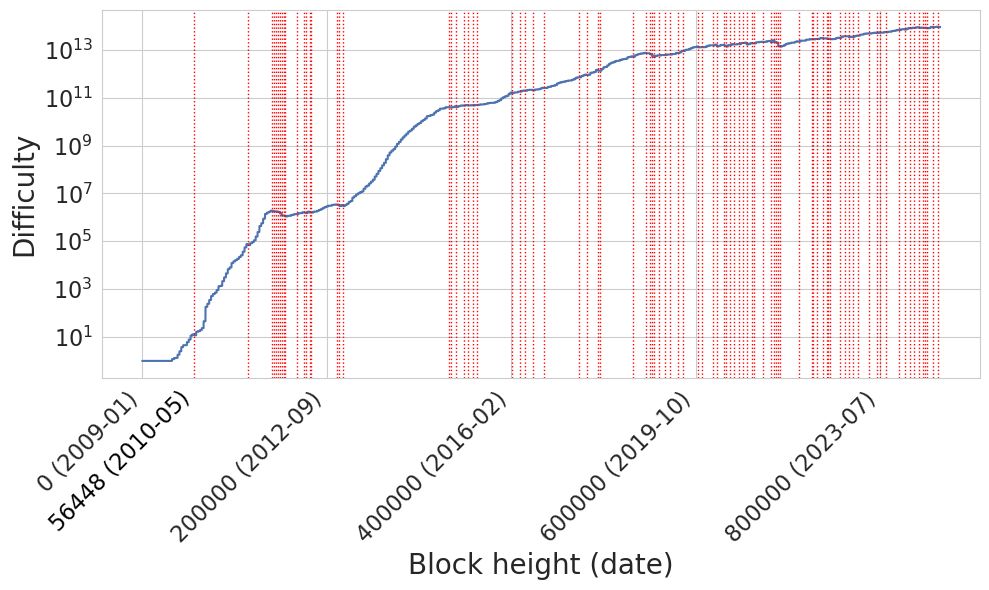

In [176]:
# Plot difficulty over time with difficulty decreases
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['difficulty'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Difficulty', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

# Change y-axis to logscale
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.offsetText.set_visible(False)  # Hide the offset text
plt.yscale('log')  # Set y-axis to log scale

# Add vertical red lines when difficulty decreases
prev_difficulty = None
first_line_label = False
for i, difficulty in enumerate(df['difficulty']):
    if prev_difficulty is not None and difficulty < prev_difficulty:
        # print(df.iloc[i]['height']) # print block heights of red lines
        plt.axvline(x=df.iloc[i]['height'], color='red', linestyle=':', linewidth=1)
        if not first_line_label:
            plt.text(df.iloc[i]['height'], -0.025, f"{df.iloc[i]['height']} ({df.iloc[i]['timestamp_dt'].strftime('%Y-%m')})", transform=plt.gca().get_xaxis_transform(), ha='right', va='top', rotation=45, color='black', size=16)
            first_line_label = True
    prev_difficulty = difficulty

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig("difficulty-variation-over-time-with-drops.pdf", format="pdf")
plt.show()

In [177]:
# # Count number of blocks at each level
# level_counts = df['block_level'].value_counts().sort_index()

# # Plot
# plt.figure()
# plt.plot(level_counts.index, level_counts.values, marker='o')
# plt.title("Number of Blocks per Level in Bitcoin Blockchain")
# plt.xlabel("Level")
# plt.ylabel("Number of Blocks")
# plt.tight_layout()
# plt.show()

/tmp/ipykernel_54111/2049246999.py:11: RuntimeWarning: divide by zero encountered in log
  y_vals_1 = 2 * K * np.log(x_vals)  # 2 * K * log(x)
/tmp/ipykernel_54111/2049246999.py:12: RuntimeWarning: divide by zero encountered in log
  y_vals_2 = 3 * K * np.log(x_vals)  # 3 * K * log(x)
/tmp/ipykernel_54111/2049246999.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


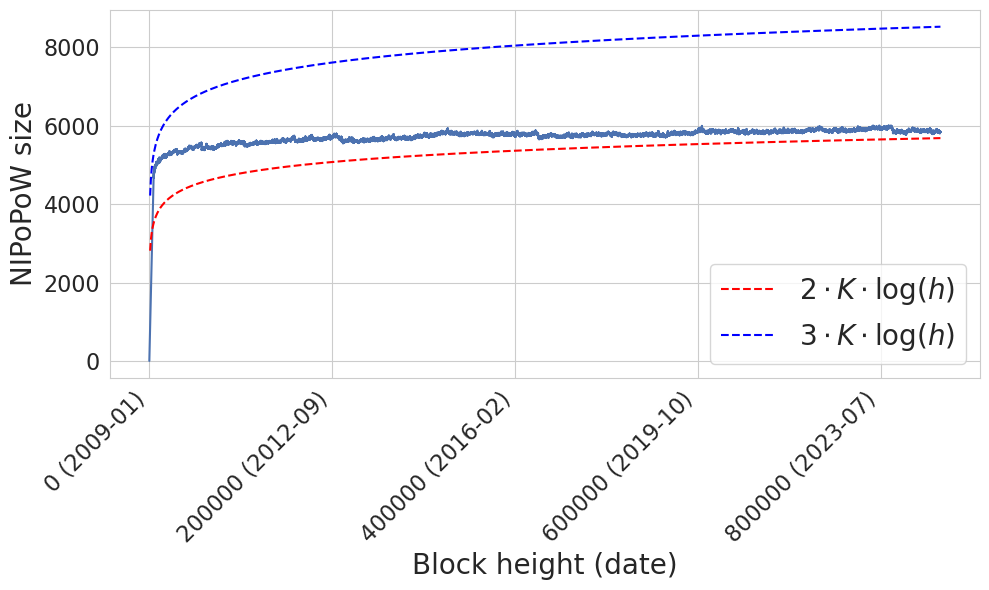

In [178]:
import numpy as np

K = 208

# Plot target over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['proof_size'], estimator=None, sort=False)

# Add lines for functions 2*K*log(x) and 3*K*log(x)
x_vals = np.linspace(df['height'].min(), df['height'].max(), 1000)  # Generate x values (block heights) for the log functions
y_vals_1 = 2 * K * np.log(x_vals)  # 2 * K * log(x)
y_vals_2 = 3 * K * np.log(x_vals)  # 3 * K * log(x)

# Use LaTeX notation with K in the label
plt.plot(x_vals, y_vals_1, label=r'$2 \cdot K \cdot \log(h)$', linestyle='--', color='red')
plt.plot(x_vals, y_vals_2, label=r'$3 \cdot K \cdot \log(h)$', linestyle='--', color='blue')

plt.xlabel('Block height (date)', size=20)
plt.ylabel('NIPoPoW size', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)

corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])

new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=20, loc='lower right')
plt.tight_layout()
plt.savefig("proof-size-variation-over-time.pdf", format="pdf")
plt.show()

/tmp/ipykernel_54111/1256945465.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


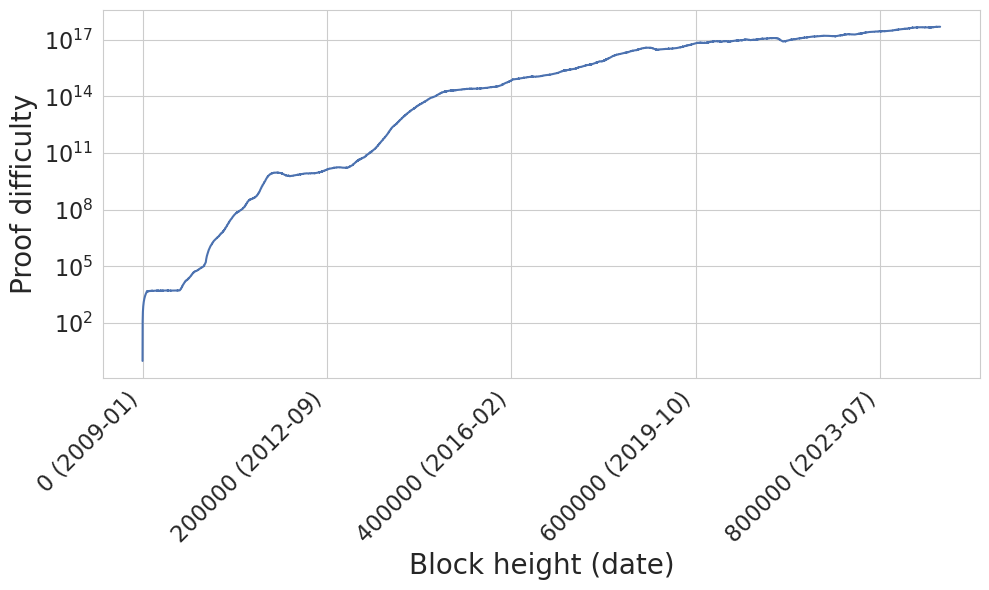

In [179]:
# Plot target over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['proof_score'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Proof difficulty', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

# Change y-axis to logscale
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.gca().yaxis.offsetText.set_visible(False)  # Hide the offset text
plt.yscale('log')  # Set y-axis to log scale

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig("proof-difficulty-variation-over-time-logscale.pdf", format="pdf")
plt.show()

/tmp/ipykernel_54111/94857157.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


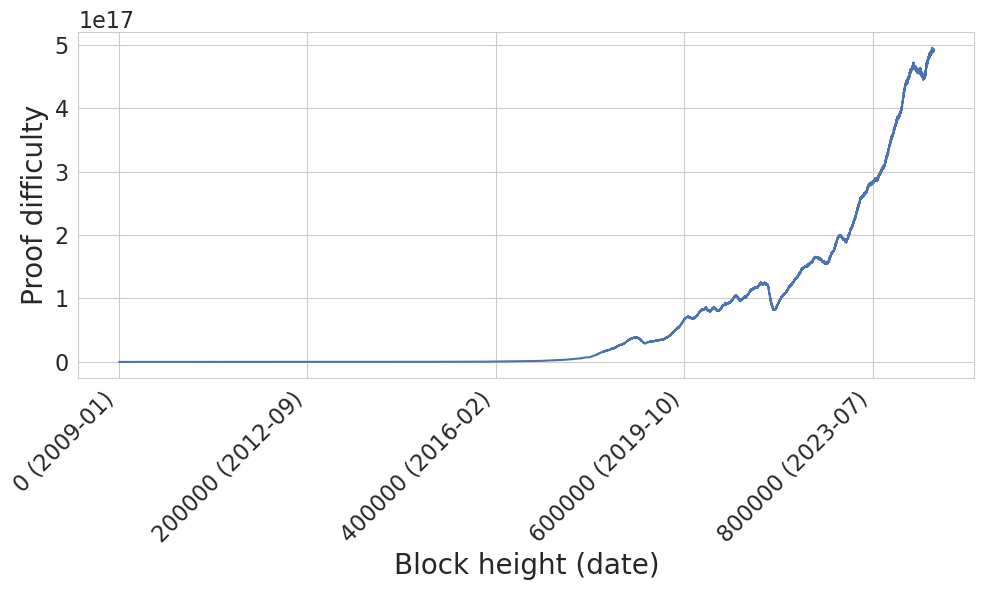

In [180]:
# Plot target over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['proof_score'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Proof difficulty', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig("proof-difficulty-variation-over-time.pdf", format="pdf")
plt.show()

/tmp/ipykernel_54111/4006900353.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


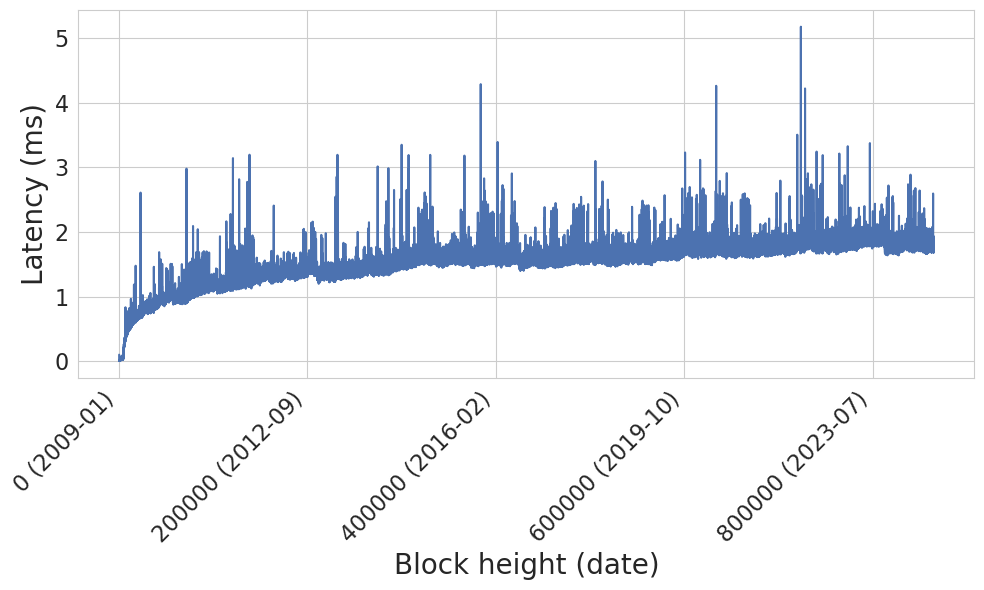

In [181]:
# Plot proof generation latency over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['proof_generation_latency'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Latency (ms)', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig("proof-generation-latency-over-time.pdf", format="pdf")
plt.show()

/tmp/ipykernel_54111/860009644.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


Index([     0,    437,    897,   1659,   3330,   6534,  12870,  25915,  52722,
        99719, 205861, 420778, 808804],
      dtype='int64')


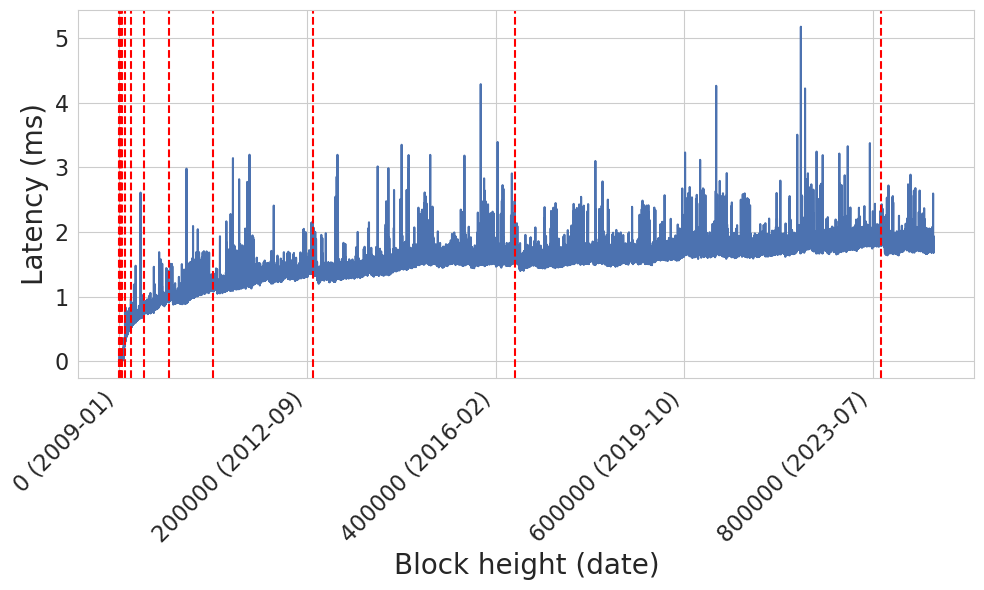

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the proof generation latency over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['proof_generation_latency'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Latency (ms)', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels()  # Get the existing tick labels
orig_x_labels.pop(0)  # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels]  # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0)  # Add relevant popped label back into heights (0)
corresponding_dates = []  # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)]  # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

# Add vertical lines for proof level changes
proof_level_changes = df['proof_level'].ne(df['proof_level'].shift())  # Boolean series where proof level changes
proof_level_change_indices = proof_level_changes[proof_level_changes].index  # Get the indices where the change occurs
print(proof_level_change_indices)
for change_idx in proof_level_change_indices:
    plt.axvline(x=df.loc[change_idx, 'height'], color='r', linestyle='--', label='Proof Level Change')


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig("proof-generation-latency-over-time-with-level-changes.pdf", format="pdf")
plt.show()


/tmp/ipykernel_54111/528429461.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


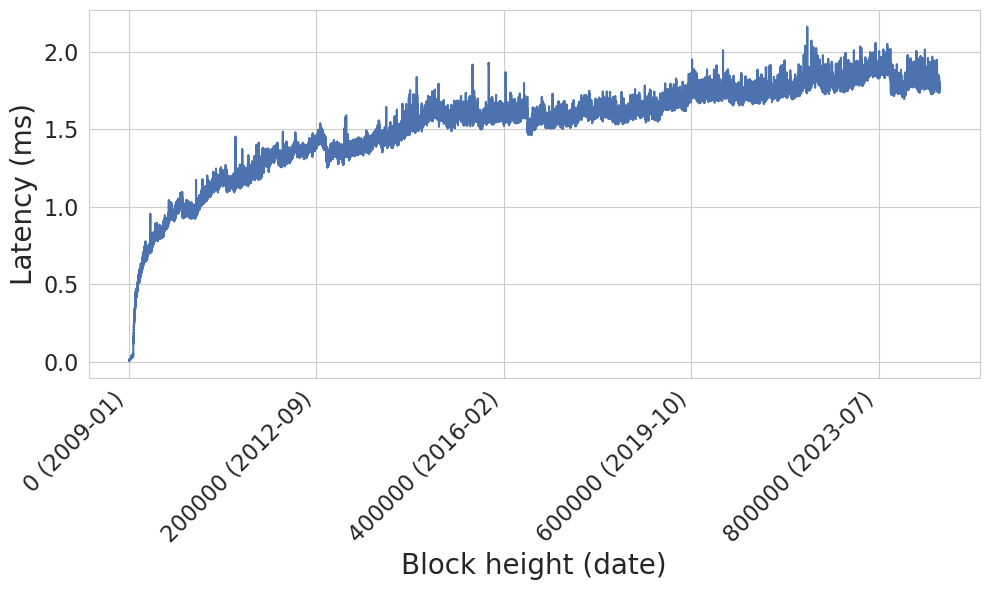

In [183]:
# Plot smoothed proof generation latency over time
df['smoothed_latency'] = df['proof_generation_latency'].rolling(window=10, center=True).mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=df['height'], y=df['smoothed_latency'], estimator=None, sort=False)

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Latency (ms)', size=20)

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig("proof-generation-latency-over-time-smoothed.pdf", format="pdf")
plt.show()

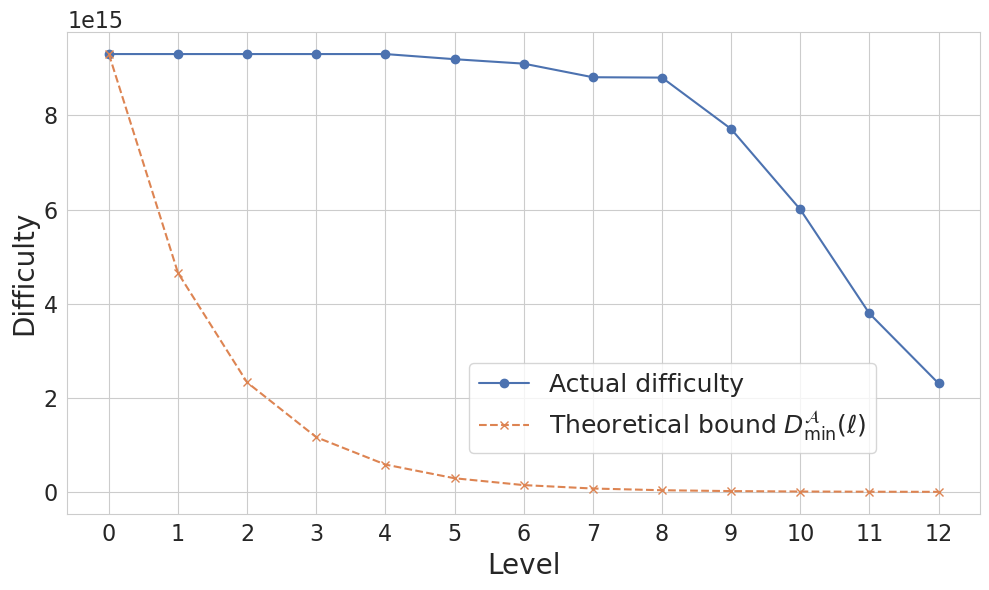

In [184]:
# Get the last row
last_row = df.iloc[-1]

# Get columns that match level_X_difficulty
level_cols = sorted(
    [col for col in df.columns if col.startswith("level_") and col.endswith("_difficulty")],
    key=lambda c: int(c.split("_")[1])
)

# Get last row level difficulties
last_row_difficulties = [last_row[col] for col in level_cols]

# Compute required difficulties
level_0_diff = last_row['level_0_difficulty']
theoretical_bounds = [level_0_diff / (2 ** mu) for mu in range(len(level_cols))]

# X-axis: level numbers
levels = list(range(len(level_cols)))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(levels, last_row_difficulties, label='Actual difficulty', marker='o')
plt.plot(levels, theoretical_bounds, label=r'Theoretical bound $D^{\mathcal{A}}_{\mathrm{min}}(\ell)$', linestyle='--', marker='x')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('Level', fontsize=20)
plt.ylabel('Difficulty', fontsize=20)
plt.xticks(levels)
plt.grid(True)
plt.legend(fontsize=18, loc='lower right', bbox_to_anchor=(0.9, 0.1))
plt.tight_layout()
plt.savefig("difficulty-vs-required-last-row.pdf", format="pdf")
plt.show()

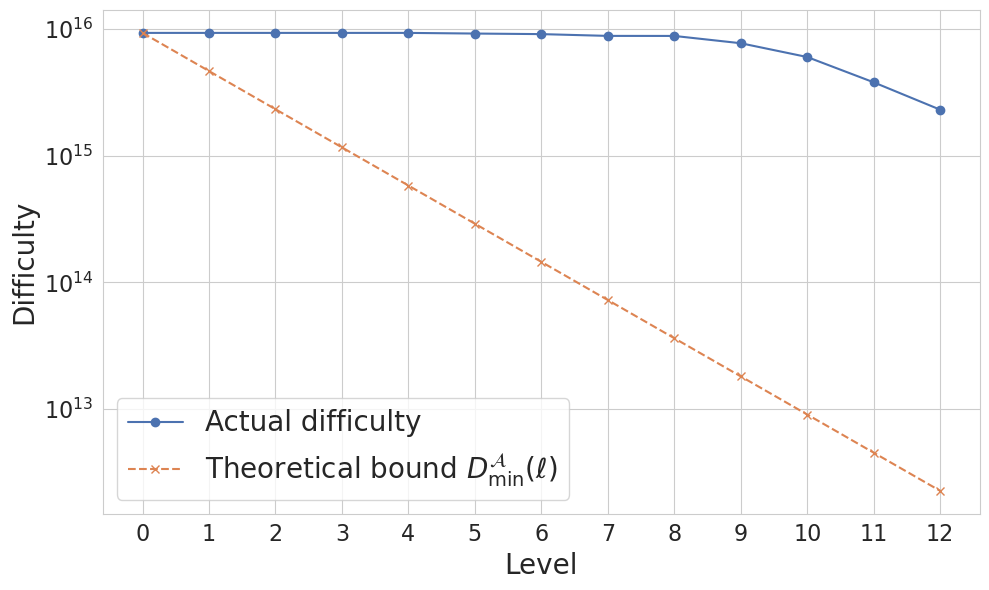

In [185]:
# Get the last row
last_row = df.iloc[-1]

# Get columns that match level_X_difficulty
level_cols = sorted(
    [col for col in df.columns if col.startswith("level_") and col.endswith("_difficulty")],
    key=lambda c: int(c.split("_")[1])
)

# Get last row level difficulties
last_row_difficulties = [last_row[col] for col in level_cols]

# Compute required difficulties
level_0_diff = last_row['level_0_difficulty']
theoretical_bounds = [level_0_diff / (2 ** mu) for mu in range(len(level_cols))]

# X-axis: level numbers
levels = list(range(len(level_cols)))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(levels, last_row_difficulties, label='Actual difficulty', marker='o')
plt.plot(levels, theoretical_bounds, label=r'Theoretical bound $D^{\mathcal{A}}_{\mathrm{min}}(\ell)$', linestyle='--', marker='x')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlabel('Level', fontsize=20)
plt.ylabel('Difficulty', fontsize=20)
plt.xticks(levels)
plt.grid(True)
plt.legend(fontsize=20)

# Set y-axis to log scale
plt.yscale('log')

plt.tight_layout()
plt.savefig("difficulty-vs-required-last-row-logscale.pdf", format="pdf")
plt.show()

In [186]:
data_folder = "../data/"
files = [
    file for file in os.listdir(data_folder)
    if "utxo-snapshot-up-to" in file and file.endswith(".json")
]
if not files:
    raise FileNotFoundError("No UTXO snapshot data file found in ../data/")

most_recent_file = max(
    files,
    key=lambda x: datetime.strptime(
        "-".join(x.split("-")[0:3]) + " " + ":".join(x.split("-")[3:6]),
        "%Y-%m-%d %H:%M:%S"
    )
)
data_path = os.path.join(data_folder, most_recent_file)
print("Using data file:", data_path)

Using data file: ../data/2025-09-02-22-00-21-utxo-snapshot-up-to-335084-interrupted.json


In [187]:
# Load data into DataFrame

with open(data_path, "r") as f:
    data = json.load(f)
df_utxo = pd.DataFrame(data)
df_utxo

,height,utxo_count,estimated_size_bytes
0,0,1,115
1,1,2,230
2,2,3,345
3,3,4,460
4,4,5,575
...,...,...,...
335080,335080,15649442,1156027128
335081,335081,15649285,1156015675
335082,335082,15649356,1156020852
335083,335083,15649257,1156013625


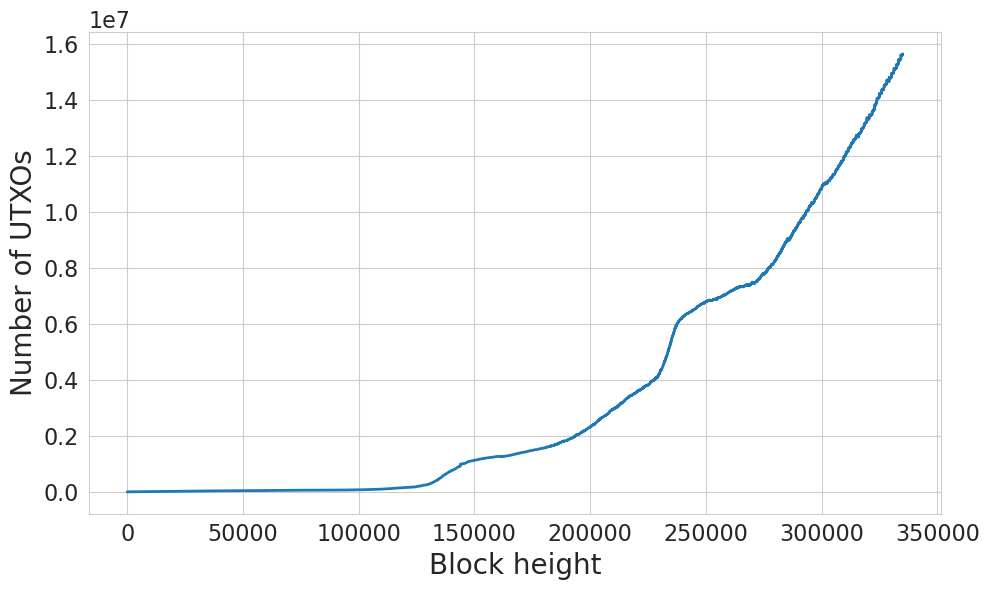

In [188]:
plt.figure(figsize=(10, 6))
plt.plot(df_utxo["height"], df_utxo["utxo_count"], label="UTXO count", color="tab:blue", linewidth=2)
plt.xlabel("Block height", fontsize=20)
plt.ylabel("Number of UTXOs", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig("utxo-count-vs-height.pdf", format="pdf")
plt.show()

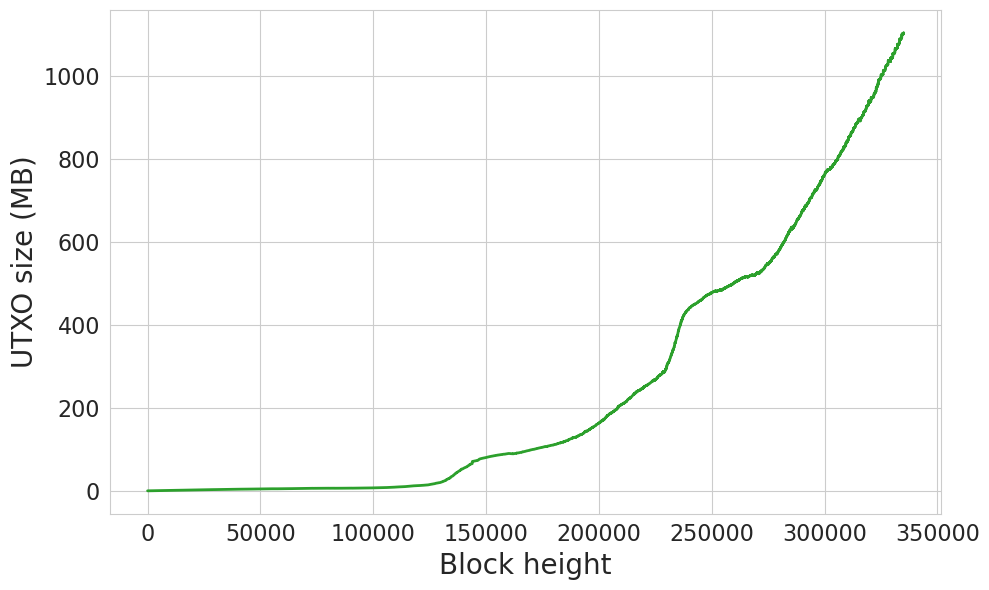

In [189]:
plt.figure(figsize=(10, 6))
plt.plot(df_utxo["height"], df_utxo["estimated_size_bytes"] / 1_048_576, label="UTXO set size", color="tab:green", linewidth=2)
plt.xlabel("Block height", fontsize=20)
plt.ylabel("UTXO size (MB)", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig("utxo-size-vs-height.pdf", format="pdf")
plt.show()

In [190]:
df_merged = pd.merge(df, df_utxo, on='height', how='inner')
df_merged

,target,proof_size,proof_score,proof_level,timestamp,block_hash,block_level,proof_generation_latency,level_0_difficulty,level_1_difficulty,...,level_10_difficulty,level_11_difficulty,level_12_difficulty,valid_difficulty_order,height,timestamp_dt,difficulty,smoothed_latency,utxo_count,estimated_size_bytes
0,2695953529101130949315647634472399133601089873...,1,1,0,1231006505,1062894486921856208405014351944454958038946459...,256,0.102282,0,0,...,0,0,0,True,0,2009-01-03 18:15:05,1.000000e+00,NaN,1,115
1,2695953529101130949315647634472399133601089873...,2,2,0,1231469665,1385949097536080555105847587592198316001649390...,0,0.014782,0,0,...,0,0,0,True,1,2009-01-09 02:54:25,1.000000e+00,NaN,2,230
2,2695953529101130949315647634472399133601089873...,3,3,0,1231469744,1120357047773602012812174058398316757397361004...,1,0.009060,0,0,...,0,0,0,True,2,2009-01-09 02:55:44,1.000000e+00,NaN,3,345
3,2695953529101130949315647634472399133601089873...,4,4,0,1231470173,1376505914199784814833151514217235786942951357...,0,0.007391,0,0,...,0,0,0,True,3,2009-01-09 03:02:53,1.000000e+00,NaN,4,460
4,2695953529101130949315647634472399133601089873...,5,5,0,1231470988,8291227170897828765976220166323524636529507549...,1,0.007629,0,0,...,0,0,0,True,4,2009-01-09 03:16:28,1.000000e+00,NaN,5,575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335080,6832520622202495088491160418127769586102050928...,5837,209335396112851,10,1419068283,5805993819911505628112388590443225817854431146...,0,1.599073,4189810425858,4150117673583,...,579044075476,0,0,True,335080,2014-12-20 09:38:03,3.945767e+10,1.600957,15649442,1156027128
335081,6832520622202495088491160418127769586102050928...,5838,209374853784158,10,1419068452,1622618192269169568201061171688115791821247072...,2,1.572609,4190506789933,4150117673583,...,579044075476,0,0,True,335081,2014-12-20 09:40:52,3.945767e+10,1.605892,15649285,1156015675
335082,6832520622202495088491160418127769586102050928...,5826,209077181196854,10,1419069069,1880955527376073577019047541189437788751677311...,1,1.654863,4191203154008,4150814037658,...,619340666895,0,0,True,335082,2014-12-20 09:51:09,3.945767e+10,1.602483,15649356,1156020852
335083,6832520622202495088491160418127769586102050928...,5819,208799809538145,10,1419069276,3820330555462530057672200490435916693176774142...,0,1.631975,4191203154008,4151510401733,...,619340666895,0,0,True,335083,2014-12-20 09:54:36,3.945767e+10,1.610827,15649257,1156013625


In [191]:
# Constants
HEADER_SIZE = 80  # bytes
FULL_BLOCK_SIZE_NON_SEGWIT = 1_000_000
FULL_BLOCK_SIZE_SEGWIT = 4_000_000
SEGWIT_HEIGHT = 481_824

# Compute sizes
compressed_sizes = []
uncompressed_sizes = []
unstable_sizes = []

for _, row in df_merged.iterrows():
    proof_size = row['proof_size']
    utxo_size = row['estimated_size_bytes']
    height = row['height']
    full_block_size = FULL_BLOCK_SIZE_SEGWIT if height >= SEGWIT_HEIGHT else FULL_BLOCK_SIZE_NON_SEGWIT

    compressed_units = max(proof_size - 4032 - 323, 0)
    compressed_size = compressed_units * HEADER_SIZE

    uncompressed_units = min(proof_size, 4032)
    uncompressed_size = uncompressed_units * HEADER_SIZE + utxo_size

    unstable_units = min(proof_size, 323)
    unstable_size = unstable_units * full_block_size

    compressed_sizes.append(compressed_size)
    uncompressed_sizes.append(uncompressed_size)
    unstable_sizes.append(unstable_size)

/tmp/ipykernel_54111/2397413307.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right


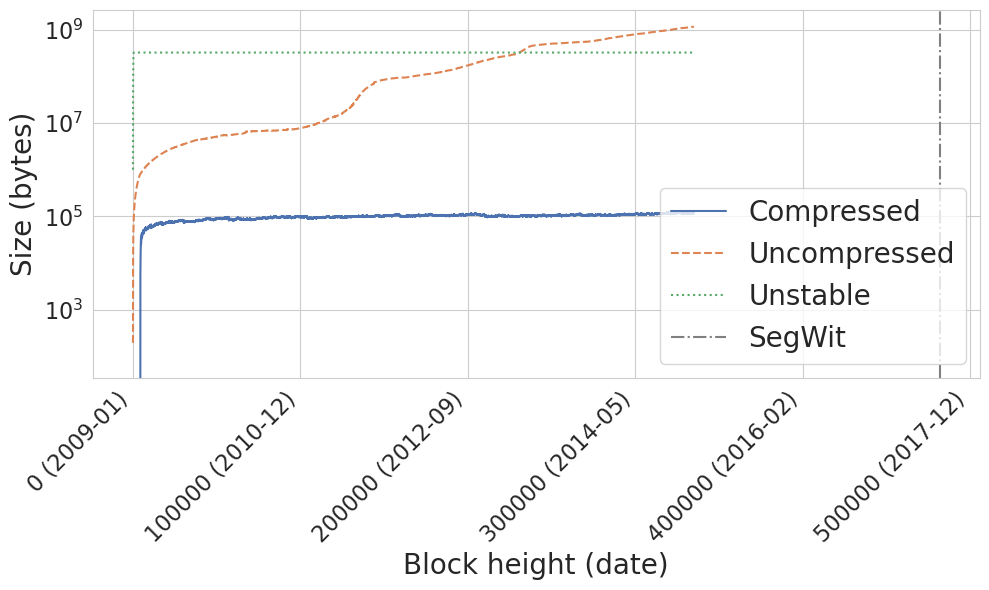

In [192]:
# Plot sizes over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_merged['height'], y=compressed_sizes, label='Compressed')
sns.lineplot(x=df_merged['height'], y=uncompressed_sizes, label='Uncompressed', linestyle='--')
sns.lineplot(x=df_merged['height'], y=unstable_sizes, label='Unstable', linestyle=':')

# Mark SegWit activation
plt.axvline(x=SEGWIT_HEIGHT, color='gray', linestyle='-.', label='SegWit')

plt.xlabel('Block height (date)', size=20)
plt.ylabel('Size (bytes)', size=20)

plt.grid(True)
plt.legend(fontsize=20)

plt.yscale('log')

# Change x-axis labels to include date
orig_x_labels = plt.gca().get_xticklabels() # Get the existing tick labels
orig_x_labels.pop(0) # Pop first element which is irrelevant (-100000)
heights = [int(label.get_text().split()[0]) for label in orig_x_labels] # Retrieve the corresponding heights for the tick labels
heights.insert(0, 0) # Add relevant popped label back into heights (0)
corresponding_dates = [] # Find the corresponding dates for the heights
for height in heights:
    idx = df['height'].sub(height).abs().idxmin()
    corresponding_dates.append(df.loc[idx, 'timestamp_dt'])
new_labels = [f"{height} ({date.strftime('%Y-%m')})" for height, date in zip(heights, corresponding_dates)] # Combine the heights and corresponding dates into new tick labels
plt.gca().set_xticklabels(new_labels, rotation=45, ha='right')  # Set the new tick labels and rotate the labels by 45 degrees and align to the right

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig("proof-size-over-time-logscale.pdf", format="pdf")
plt.show()